In [1]:
import sys
sys.path.append("../")

from utils import *
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
def cost(h, N, Cmin=1, Cmax=10, rate=1):
    h = (h - 1) / (N - 1)
    y = 1 - (1 - h)**rate
    return Cmin + y * (Cmax - Cmin)

def delta(h, N, Cmin=1, Cmax=10, rate=1):
    h = (h - 1) / (N - 1)
    y = (1 - h)**rate
    return Cmin + y * (Cmax - Cmin)

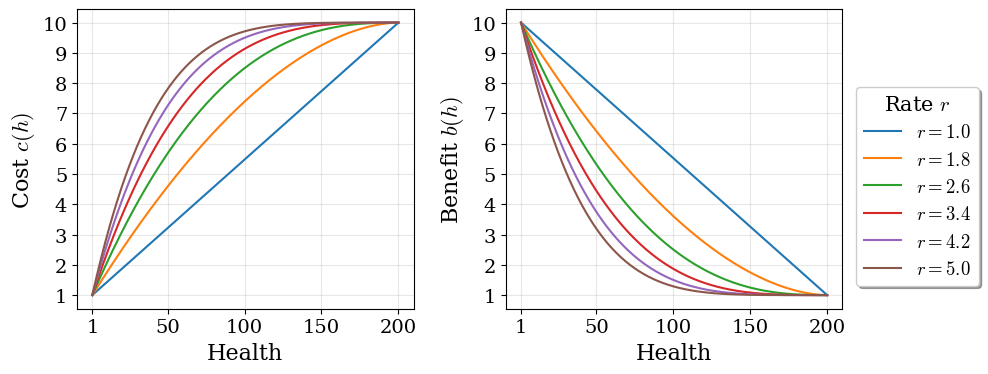

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

h = np.linspace(1, 200, 1000)
rates = np.linspace(1, 5, 6)

for rate in rates:
    axs[0].plot(h, cost(h, N=200, rate=rate), label=f'$r={rate:.1f}$')
    axs[1].plot(h, delta(h, N=200, rate=rate))

axs[0].set_ylabel(r"Cost $c(h)$")
axs[1].set_ylabel(r"Benefit $b(h)$")

for i in range(2):
    axs[i].grid(alpha=0.3)
    axs[i].set_xlabel("Health")
    axs[i].set_yticks(np.arange(1, 11))
    # Added specific X-ticks here
    axs[i].set_xticks([1, 50, 100, 150, 200])

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='center right', title=r"Rate $r$", shadow=True)
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig("../figures/health_cost_benefit.pdf", bbox_inches="tight")
plt.show()